In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from datetime import datetime
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, RegexpTokenizer
from textblob import TextBlob 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import Perceptron
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('amazon_reviews_train.csv',
                 encoding = 'latin')
dff = pd.read_csv('amazon_reviews_test.csv',
                 encoding = 'latin')
df.head()

C:\Users\Saad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0,2,5,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,88,US,10349513,R2P8FQQFOE14Y6,B00J7G9Z7C,644560201,"Fresh 'n Brite Denture Cleaning Paste, 3.8 Oun...",Personal_Care_Appliances,5,0,1,N,Y,DENTU CREAM,THESE WERE FINE,30/08/2015
1,32032,US,5322216,RBHAVVQXGNL8H,B0073TX6IO,849427637,Pedi Spin As Seen on TV Pedispin,Personal_Care_Appliances,4,0,0,N,N,Pleasantly surprised.,I have loved two ped eggs until their unfortun...,19/01/2014
2,8389,US,47088914,RJYOOKBM15QAD,B00BR04QIE,497208580,Enfamil Expecta Lipil DHA Supplement for Pregn...,Health & Personal Care,5,0,0,N,N,My son is 8 yrs old now. He has ...,My son is 8 yrs old now. He has outstanding i...,31/08/2015
3,37916,US,1467522,R32USCCIYOUE6,B005SV1R1W,64995830,Hello Kitty Nail Art Sticker - 5 pack Mixed De...,Beauty,5,0,0,N,Y,cute and fun to use,So many in this package! My daughter has had ...,26/08/2015
4,37733,US,37066889,R2S4QPBCB36O56,B00A2F4ID8,220647338,Frontier Natural Products - Amber Wide Mouth J...,Personal_Care_Appliances,5,2,3,N,Y,I have no complaints,The lid and jar are both of nice quality. I'm ...,06/08/2013


In [3]:
df.describe()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
count,120049,120026,120012,120008,120007,120004,120003,120003,120003,120002,120001,120000,120000,119999,119983,119999
unique,66809,27,102177,120008,54496,56720,50778,7,14,240,264,3,3,68043,110258,1138
top,45765,US,15293426,RHF0967FU1VB7,B00H9L7VIW,851045898,boostULTIMATE - 60 Capsules - Increase Workout...,Health & Personal Care,5,0,0,N,Y,Five Stars,Good,31/08/2015
freq,3,120000,41,1,3146,2579,3146,40017,41944,69758,62290,119583,103433,24451,361,13817


Copy data frames into new names, df1 for training data and df2 for test data

In [4]:
df1 =  df.copy()
df2 =  dff.copy()

The product category column contains 7 unique values which is not correct because there should be 3 uniques product categories. Let's view all the categories and clean the data 

In [5]:
df1.product_category.unique()

array(['Personal_Care_Appliances', 'Health & Personal Care', 'Beauty',
       'I have these everywhere! One in the bathroom and two in the kitchen! I like that I can label one with a &#34;V&#34; for vegetables and there are plenty of them so I can easily replace them when I need to. So far, I have found they are very durable!',
       nan,
       ' Mens\tHealth & Personal Care\t2\t2\t2\tN\tY\tBeing diabetic',
       ' because I very much like the design', '2375'], dtype=object)

In [6]:
df1 = df1.loc[df['product_category'].isin(['Personal_Care_Appliances','Health & Personal Care','Beauty'])].copy()

In [7]:
df1.product_category.unique()

array(['Personal_Care_Appliances', 'Health & Personal Care', 'Beauty'],
      dtype=object)

Now we only have 3 categories. Let's view the distribution of categories. 

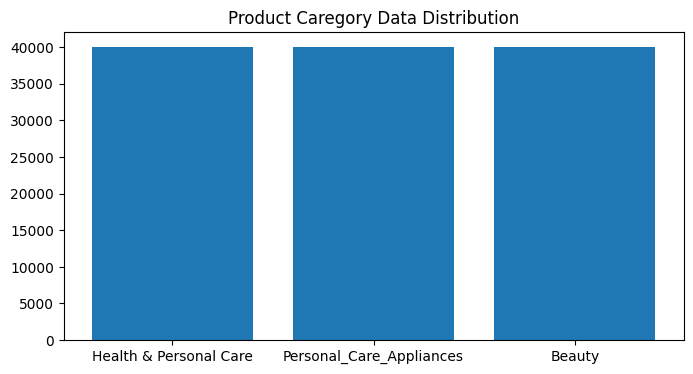

In [8]:
val_count = df1.product_category.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Product Caregory Data Distribution")
plt.show()

Let's chek how many purchases are verified 

Now there are three categories.There is no skewness hence the data is balanced.

Let's see how many purchases are verified

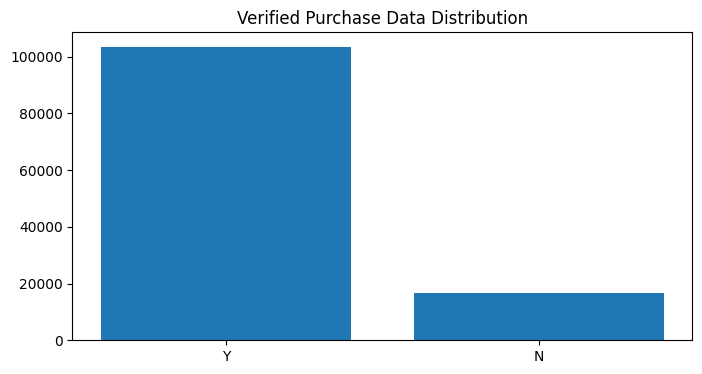

In [9]:
val_count = df1.verified_purchase.value_counts()
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Verified Purchase Data Distribution")
plt.show()

We can see that most of the purchases are verified. The unverified purchase could also containg information of people who bought products using discounts. We can change the dataset accordingly

Let's dig into the dateset..s

In [10]:
import random
random_ind = [random.randint(1,len(df1.product_title)) for i in range(10)] # choose random indexes from dataframe
df1.loc[random_ind,:].head(10) # Random rows display

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
44762,28128,US,50986729,R35J51JACVQPEX,B00V0XQAU0,772661359,"Burt's Bees Fabulous Mini's Travel Set, 6 Trav...",Beauty,3,0,0,Y,N,Mediocre as a gift or travel; useful as a tria...,This is a useful and economical way to try sev...,28/08/2015
41726,46135,US,17935299,RUV7BXK6U1VWY,B0080L9FHA,955688994,Redmond Earthpaste - Natural Non-Flouride Toot...,Beauty,5,0,0,N,Y,... maybe they will tweak it to the right thic...,Wish the paste was thicker maybe they will twe...,25/08/2015
112969,30634,US,23627658,R33VS2NV98FT4I,B00AYEPE6C,236963092,It's A 10 Miracle Five Minute Hair Repair Cond...,Beauty,5,0,0,N,Y,This stuff is amazing! I have fine hair that h...,This stuff is amazing! I have fine hair that h...,27/08/2015
65543,10380,US,51947031,RRJZ2IK8LLX4F,B00KW4PO82,602674756,Omron 10 Series Wireless Upper Arm Blood Press...,Health & Personal Care,5,0,0,N,Y,Five Stars,Very easy to use at home.,30/08/2015
116195,38735,US,42030,R2V5SSNKF1OXBM,B005GSCJ0A,582539644,Colorescience Pro Sunforgettable SPF 50 Brush ...,Beauty,5,0,0,N,Y,Five Stars,Amazing!!!,26/08/2015
78270,31529,US,15638404,RP724XCF2WMHD,B00016JCZM,782682730,Rimless Specs-tacular Tube Reader,Health & Personal Care,3,0,0,N,Y,"If size matters to you, this is your choice","fragile case, relatively high-priced.",27/08/2015
15596,41911,US,20242524,RY0PU0QBQIA39,B003ZSCFQ6,204035109,NOVA Medical Products Deluxe Bath Seat with Ba...,Health & Personal Care,5,0,0,N,Y,Five Stars,"Easy to assemble, light and stable.",26/08/2015
101060,9249,US,43090657,R25PBLZKM9EKDQ,B00ZXFJ7SS,594405859,CICI&SISI Nail Stamping Stamping Plate Set Jum...,Beauty,5,0,1,N,Y,"love iit,âºâºâº",Love it. Really good collection,30/08/2015
40871,23984,US,23805265,R3ITHNEAXSJUWO,B00VU52L7Y,414389841,OPI Nail Polish Lacquer - Hawaii Collection - ...,Health & Personal Care,5,0,0,N,Y,Perfect Summer Nails!,I love OPI and I love this polish.,28/08/2015
53064,7541,US,7402102,R29KHY9T0XXL4V,B00K2SL7LG,364317643,Comfort Shield Premium Waterproof Sheet Protec...,Health & Personal Care,5,0,0,N,N,Love it! Makes a wet bed easy to clean ...,I bought this product for my niece who has bed...,31/08/2015


##  Preprocessing

In [11]:
df1["overall_review"] = df1["review_body"] + ' ' + df1["review_headline"] # join review body and headline
df2["overall_review"] = df2["review_body"] + ' ' + df2["review_headline"]

In [12]:
df1['star_rating'].unique()

array([5, 4, 1, 3, 2, '5', '3', '4', '1', '2'], dtype=object)

The column has combination of both string and int

Convert them all to int

In [71]:
df1['star_rating'] = df1['star_rating'].astype('int64')   # Convert all Star rating values to int

In [14]:
#Tokenizer
tokenizer=ToktokTokenizer()
#English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [15]:
def process_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Get rid of square brackets
def del_b_sqr_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Remove noise from text
def remove_noise(text):
    text = process_html(text)
    text = del_b_sqr_brackets(text)
    return text
#Apply function
df1['product_title']=df1['product_title'].apply(remove_noise)
df2['product_title']=df2['product_title'].apply(remove_noise)

df1['overall_review']=df1['overall_review'].apply(remove_noise)
df2['overall_review']=df2['overall_review'].apply(remove_noise)


In [16]:
#Function to remove special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function
df1['product_title']=df1['product_title'].apply(remove_special_characters)
df2['product_title']=df2['product_title'].apply(remove_special_characters)

df1['overall_review']=df1['overall_review'].apply(remove_special_characters)
df2['overall_review']=df2['overall_review'].apply(remove_special_characters)

In [17]:
#Stemmer
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function
df1['product_title']=df1['product_title'].apply(simple_stemmer)
df2['product_title']=df2['product_title'].apply(simple_stemmer)

df1['overall_review']=df1['overall_review'].apply(simple_stemmer)
df2['overall_review']=df2['overall_review'].apply(simple_stemmer)

In [18]:
#set stopwords
stop=set(stopwords.words('english'))
print(stop)

#removing stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtr_tkn = [token for token in tokens if token not in stopword_list]
    else:
        filtr_tkn = [token for token in tokens if token.lower() not in stopword_list]
    filtrd_txt = ' '.join(filtr_tkn)    
    return filtrd_txt
#Apply function
df1['product_title']=df1['product_title'].apply(remove_stopwords)
df2['product_title']=df2['product_title'].apply(remove_stopwords)

df1['overall_review']=df1['overall_review'].apply(remove_stopwords)
df2['overall_review']=df2['overall_review'].apply(remove_stopwords)

{'ain', "that'll", 'y', 'than', 'o', 'weren', 'them', 'herself', 'too', 'just', "shan't", 'does', 'be', 'to', 'yours', "you're", 'before', 'an', 'once', "aren't", 'a', 'ours', 's', 'm', "needn't", 'but', 'been', "should've", 'she', 'into', 'only', 'whom', 'above', 'during', "didn't", "wouldn't", "couldn't", 'shan', "you'd", 'more', 'not', "she's", "mightn't", 'her', 'him', 'theirs', "it's", 'your', 'below', 'itself', 'aren', "mustn't", 'here', 'was', 'doing', 'can', 'd', "isn't", "haven't", 'most', 'mightn', 'had', 'until', 'his', 'out', 'couldn', 'ourselves', 'isn', 'hadn', 'how', "won't", 're', 'doesn', 'or', 'few', 'of', 'shouldn', 'with', 'if', 'while', 'who', 'from', 'hers', 'some', 'haven', 'then', 'yourself', 'for', 'those', 'and', 'all', 'we', 'again', 'through', 'have', 'where', 'wasn', 'mustn', 'there', 'their', "you've", 'that', 'are', "weren't", 'under', 'our', 'against', 'nor', 'don', 'own', 'same', 'having', 'further', 'll', "you'll", 'has', 'no', 'they', 'didn', 'its', '

##  Split data into train and test set for machine learning

In [19]:
df1.fillna(' ')

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,overall_review
0,88,US,10349513,R2P8FQQFOE14Y6,B00J7G9Z7C,644560201,fresh n brite dentur clean past 38 ounc pack 2,Personal_Care_Appliances,5,0,1,N,Y,DENTU CREAM,THESE WERE FINE,30/08/2015,fine dentu cream
1,32032,US,5322216,RBHAVVQXGNL8H,B0073TX6IO,849427637,pedi spin seen tv pedispin,Personal_Care_Appliances,4,0,0,N,N,Pleasantly surprised.,I have loved two ped eggs until their unfortun...,19/01/2014,love two ped egg unfortun untim death control ...
2,8389,US,47088914,RJYOOKBM15QAD,B00BR04QIE,497208580,enfamil expecta lipil dha supplement pregnant ...,Health & Personal Care,5,0,0,N,N,My son is 8 yrs old now. He has ...,My son is 8 yrs old now. He has outstanding i...,31/08/2015,son 8 yr old ha outstand intellig took expecta...
3,37916,US,1467522,R32USCCIYOUE6,B005SV1R1W,64995830,hello kitti nail art sticker 5 pack mix design,Beauty,5,0,0,N,Y,cute and fun to use,So many in this package! My daughter has had ...,26/08/2015,mani thi packag daughter ha coupl toenail coup...
4,37733,US,37066889,R2S4QPBCB36O56,B00A2F4ID8,220647338,frontier natur product amber wide mouth jar wh...,Personal_Care_Appliances,5,2,3,N,Y,I have no complaints,The lid and jar are both of nice quality. I'm ...,06/08/2013,lid jar nice qualiti im veri happi order jar l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120044,4468,US,15869617,R1YV02CELTIWJG,B004H76F7E,191034621,alter ego itali garlic shampoo plu vitamin 338...,Beauty,4,0,0,N,Y,Does not have garlic smell,"Very surprised, shampoo does not smell like ga...",31/08/2015,veri surpris shampoo doe smell like garlic ha ...
120045,17446,US,107309,R2GHO0KH3IPOZ1,B00K4BVC20,944869190,liquid clenserv 8 fl oz,Health & Personal Care,5,0,0,N,Y,Just follow directions,VPX always makes great products. I was disappo...,29/08/2015,vpx alway make great product wa disappoint tri...
120046,7898,US,48881148,R3KUDR4IOZTGVJ,B004H04QHC,780488386,premier dead sea bodi butter red passion fruit...,Beauty,4,0,0,N,Y,Four Stars,good product,31/08/2015,good product four star
120047,35861,US,49823990,R1M9RHPBWCSFEQ,B00BVO7F8E,468402906,food essenti oil cypress 1 fl oz,Beauty,3,0,1,N,Y,Three Stars,It is good for cleaning home,27/08/2015,good clean home three star


In [96]:
s = pd.Index(df2['overall_review'].isnull())

In [95]:
df2.drop(df2[s].index)

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,review_headline,review_body,review_date,overall_review,product_category
0,37873,US,51148531,R11XM8ZQ8PRE63,B001GGVKFG,267704781,cervic neck traction,"not high tech or an ""amazing miracle cure"" but...",I have a pinched nerve that causes neck stiffn...,03/08/2013,"not high tech or an ""amazing miracle cure"" but...",Personal_Care_Appliances
1,27099,US,19793225,R3BBTHPYZQNI99,B00S7K1432,749514455,novaferrum multivitamin iron supplement infant...,Great tasting,My 2 year old has been taking iron supplements...,28/08/2015,Great tastingMy 2 year old has been taking iro...,Health & Personal Care
2,10763,US,34902123,R157WRV1CDTILL,B007U90JC8,53280325,sech vite dri fast top coat 05 ounc 6 pack,Five Stars,The best top coat there is.,30/08/2015,Five StarsThe best top coat there is.,Beauty
3,28087,US,15114496,R344272VJ9EG3O,B00NI33BZC,127427746,loreal total repair 5 damag eras balm 85 ounc,Five Stars,my wife love it,28/08/2015,Five Starsmy wife love it,Beauty
4,8114,US,19710836,R1Q6FS9I6Z2V2V,B00UCT5L6W,392392545,newest eleaf istick 50w full kit red,good product,Sold as red opened as pink. Fast shipping,30/04/2015,good productSold as red opened as pink. Fast s...,Personal_Care_Appliances
...,...,...,...,...,...,...,...,...,...,...,...,...
29994,37920,US,26537228,R12ERR7TYMFJJG,B00132ZG3U,758099411,conair 1875 watt tourmalin ceram hair dryer,Good hair dryer,This is the first hair dryer I bought here in ...,26/08/2015,Good hair dryerThis is the first hair dryer I ...,Beauty
29995,8977,US,11015859,RW7MKF6KH0XV0,B00CNTJHQO,393708525,sage shampoo heavi dandruff jojoba argan organ...,My new fav!,I absolutely love this shampoo! I started to g...,30/08/2015,My new fav!I absolutely love this shampoo! I s...,Beauty
29996,1153,US,46859036,RHV9C1WL0L0WV,B00P6TUO5G,170248843,viva natur organ nongmo cacao powder 2 pound bag,Healthy stuff at a reasonable price.,These guys make a quality product. I only ord...,14/08/2015,Healthy stuff at a reasonable price.These guys...,Personal_Care_Appliances
29997,48198,US,49865317,R1C8ND1WB23AN2,B000063XG6,348747157,tanita 2201 super ultim bodi fat monitor scale,Sturdy and no trouble,I've owned this Tanita Scale for at least 8 ye...,01/11/2012,Sturdy and no troubleI've owned this Tanita Sc...,Personal_Care_Appliances


In [42]:
df1['overall_review'] = df1['overall_review'].astype('str')    # Convert to string if any other type
df2['overall_review'] = df2['overall_review'].astype('str')

In [72]:
# Splitting data into training set and validation for product title
X_train, X_test, y_train, y_test = train_test_split(df1['product_title'], df1['product_category'], \
                                                    test_size=0.2, random_state=1)

# Splitting data into training set and validation for reviews
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1['overall_review'], df1['star_rating'], \
                                                    test_size=0.2, random_state=1)


## Logistic Regression

In [53]:
from sklearn import metrics

In [54]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set for category: {:.4f}".format(accuracy_score(y_test, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report for category : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix for category : \n", metrics.confusion_matrix(y_test, predictions))
    
def modelEvaluation1(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set for reviews: {:.4f}".format(accuracy_score(y_test1, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report for reviews : \n", metrics.classification_report(y_test1, predictions))
    print("\nConfusion Matrix for reviews: \n", metrics.confusion_matrix(y_test1, predictions))

In [74]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
tfidf1 = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf1= tfidf1.fit_transform(X_train1)
X_train_tfidf1 = tfidf.fit_transform(X_train1.values.astype('U'))

# Logistic Regression
lr = LogisticRegression(max_iter = 300)
lr1 = LogisticRegression(max_iter = 300)

lr.fit(X_train_tfidf, y_train)
lr1.fit(X_train_tfidf1, y_train1)

Number of features : 9918 

Show some feature names : 
 ['00', 'a12611', 'brand', 'decimu', 'foldngo', 'ir', 'minimum', 'pjur', 'set', 'tingl']


LogisticRegression(max_iter=300)

In [75]:
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients for titles :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients for titles : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

feature_names = np.array(tfidf1.get_feature_names())
sorted_coef_index = lr1.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients for reviews :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients for reviews : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients for titles :
['doterra' 'watch' 'massag' 'scale' 'cane' 'leven' 'electron' 'parker'
 'pill' 'quantiti']

Top 10 features with largest coefficients for titles : 
['cosmet' 'eyelash' 'perfum' 'serum' 'wig' 'lipstick' 'eyelin' 'foundat'
 'ounc' 'mascara']

Top 10 features with smallest coefficients for reviews :
['great' 'five' 'love' 'perfect' 'four' 'well' 'best' 'three' 'easi'
 'amaz']

Top 10 features with largest coefficients for reviews : 
['star' 'one' 'return' 'wast' 'useless' 'disappoint' 'worst' 'junk'
 'terribl' 'scam']


In [76]:
# Evaluating on the validaton set for category
predictions = lr.predict(tfidf.transform(X_test))
modelEvaluation(predictions)

# Evaluating on the validaton set for reviews
predictions1 = lr1.predict(tfidf1.transform(X_test1))
modelEvaluation1(predictions1)


Accuracy on validation set for category: 0.8794

Classification report for category : 
                           precision    recall  f1-score   support

                  Beauty       0.87      0.91      0.89      8046
  Health & Personal Care       0.86      0.84      0.85      8016
Personal_Care_Appliances       0.91      0.89      0.90      7938

                accuracy                           0.88     24000
               macro avg       0.88      0.88      0.88     24000
            weighted avg       0.88      0.88      0.88     24000


Confusion Matrix for category : 
 [[7296  553  197]
 [ 764 6727  525]
 [ 313  542 7083]]

Accuracy on validation set for reviews: 0.7896

Classification report for reviews : 
               precision    recall  f1-score   support

           1       0.71      0.73      0.72      2185
           2       0.63      0.31      0.41      1247
           3       0.66      0.43      0.52      1826
           4       0.67      0.42      0.51      342

## Predict Categories on test data

In [77]:
df2['product_category'] = lr.predict(tfidf.transform(df2['product_title']))
products = df2[['product_id','product_category']].copy()
products.head(10)

,product_id,product_category
0,B001GGVKFG,Personal_Care_Appliances
1,B00S7K1432,Health & Personal Care
2,B007U90JC8,Beauty
3,B00NI33BZC,Beauty
4,B00UCT5L6W,Personal_Care_Appliances
5,B00HES9CMS,Personal_Care_Appliances
6,B00117ZWOK,Beauty
7,B00V1QG4F2,Personal_Care_Appliances
8,B000VFTSN4,Personal_Care_Appliances
9,B00077E32C,Personal_Care_Appliances


## Predict Reviews on test data

In [105]:
df2['overall_review'] = df2['review_headline'] + df2['review_body']
df2['review_rating'] = lr1.predict(tfidf1.transform(df2['overall_review'].values.astype('U')))
reviews = df2[['review_id','review_rating']].copy()
reviews.head(10)

,review_id,review_rating
0,R11XM8ZQ8PRE63,5
1,R3BBTHPYZQNI99,5
2,R157WRV1CDTILL,5
3,R344272VJ9EG3O,5
4,R1Q6FS9I6Z2V2V,5
5,R2EXQ2CJ7M2079,5
6,R3RP8RCJZITW7M,5
7,R1JXVRF98GZ0FJ,3
8,R1R521PQG1M1SZ,4
9,R3OBL1XTA3B27A,5


## Create csv files

In [107]:
products.to_csv("products.csv",index= False)
reviews.to_csv("reviews.csv",index= False)